In [26]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
from scipy.optimize import minimize

In [27]:
np.set_printoptions(suppress=True, precision=6)

In [28]:
from breakdown import SimpleBreakdownModelClass

In [29]:
model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':10,'rho':8})

In [30]:
par = model.par
sol = model.sol
sim = model.sim

In [31]:
%time model.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 10min 4s, sys: 8.98 s, total: 10min 13s
Wall time: 10min 55s


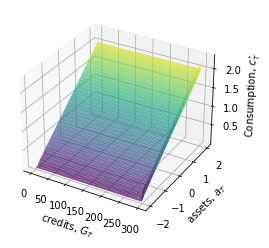

In [32]:
# last period
a_mesh, G_mesh = np.meshgrid(par.a_grid[:],par.G_grid,indexing='ij')

t = par.T-2
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(G_mesh, a_mesh, sol.c[t,0,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='Consumption, $c_{T}^{\star}$');

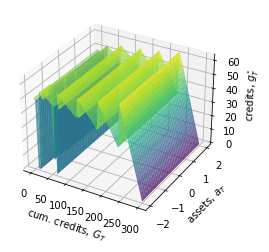

In [33]:
t = par.T-49

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(G_mesh, a_mesh, sol.g[t,1,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='cum. credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='credits, $g_{T}^{\star}$');

In [34]:
par.Nm

10

In [35]:
print(sol.c_s[par.T-5,0,:,29])

[0.568625 0.610216 0.63054  0.64815  0.664839 0.676471 0.714432 0.733774
 0.75099  0.767674 0.784314 0.818405 0.836862 0.853815 0.870696 0.892157
 0.922148 0.939823 0.95663  0.973956 0.999948 1.025626 1.04271  1.05947
 1.077341 1.107838 1.128925 1.145508 1.16239  1.18094  1.215648 1.231956
 1.248254 1.265357 1.284763 1.323531 1.33471  1.350986 1.368413 1.388728
 1.431327]


In [36]:
print(sol.g[par.T-49,0,0,:])

[49.49469  49.070618 48.6698   48.276398 48.       45.       42.
 39.        0.        0.        0.       52.912994 52.370453 51.889069
 51.424713 51.       49.932312 49.394165 48.914154 48.448975 48.
  0.        0.        0.        0.       55.814026 55.1922   54.620728
 54.       52.830963 52.212158 51.64032  51.       49.848083 49.232391
 48.660004 48.       46.865479 46.252899 45.679871 45.       58.657837
 57.899231 57.       55.671936 54.914429 54.       52.68631  51.929718
 51.       49.700867 48.94519  48.       46.715698 45.961029 45.
 43.730804 42.977142 42.       40.746368 60.       58.36972  57.
 55.380432 54.       52.391327 51.       49.402588 48.       46.414124
 45.       43.426117 42.       40.438568 39.       37.451569 36.
 34.465393 33.       63.       60.00001  57.00001  54.00001  51.00001
 48.00001  45.00001  42.00001  39.00001  36.00001  33.00001  30.00001
 27.00001  24.00001  21.00001  18.00001  15.00001  12.00001   9.00001
  6.00001   3.00001   0.      ]


In [37]:
sol.V_s[par.T-9,0,2,0]
sol.V_w[par.T-9,0,0]

-10.9491120713536

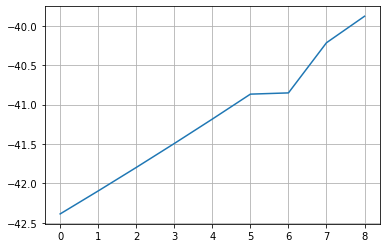

In [38]:
y_ = [model.value_of_choice_s(2.0, 80.0, 0, 1.0, 220, t) for t in range(9)]
fig, ax = plt.subplots()
ax.grid()
plt.xticks(range(10))
ax.plot(y_)

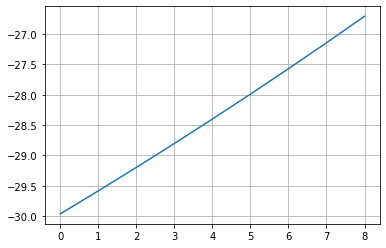

In [39]:
z_ = [model.value_of_choice_w(2.0,0, 2.0, t) for t in range(9)]
fig, ax = plt.subplots()
ax.grid()
plt.xticks(range(10))
ax.plot(z_)

In [40]:
model.simulate()

0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3


In [108]:
cb_counter = 0

def callbackF(x, y, z):
    global cb_counter
    cb_counter += 1
    print(cb_counter)
    print("rho: %a, gamma_max: %a, gamma_min: %a" % (x, y, z))

def pis(x,y,z):
    callbackF(x,y,z)
    
    model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':10,'rho':x,'gamma_max':y,'gamma_min':z})
    model.solve()
    model.simulate()


    helper = np.array([7,6,6,5,5,5,5,5,5,5])
    ret = np.zeros(10)
    step = np.zeros(10)
    for i in range(10):
        model_a = model.copy()

        model_a.sim.m_init[:] = i
        model_a.sim.a_init[:] = 0.0
        model_a.sim.e_init[:] = 0
        model_a.simulate()

        listen = np.mean(model_a.sim.g,axis=0)
        listen = np.sum(listen>0.001)
        print("Type %a = %a " % (i, listen), end = "")
        ret[i] = listen

        step[i] = (listen - helper[i])**2

    print("-----------------")
    return np.sum(step)

In [109]:
obj = lambda x: pis(x[0],x[1],x[2])
res = minimize(obj,[7.35,0.0105,0.0162], method='Nelder-Mead', callback=callbackF, options={'disp': True})

print(res.x[0])

1
rho: 7.0, gamma_max: 0.01, gamma_min: 0.018
Type 0 = 0 Type 1 = 6 Type 2 = 6 Type 3 = 6 Type 4 = 6 Type 5 = 5 Type 6 = 5 Type 7 = 5 Type 8 = 5 Type 9 = 5 -----------------
2
rho: 7.3500000000000005, gamma_max: 0.01, gamma_min: 0.018
Type 0 = 0 Type 1 = 6 Type 2 = 6 Type 3 = 6 Type 4 = 6 Type 5 = 5 Type 6 = 5 Type 7 = 5 Type 8 = 5 Type 9 = 5 -----------------
3
rho: 7.0, gamma_max: 0.0105, gamma_min: 0.018
Type 0 = 0 Type 1 = 0 Type 2 = 6 Type 3 = 6 Type 4 = 6 Type 5 = 5 Type 6 = 5 Type 7 = 5 Type 8 = 5 Type 9 = 5 -----------------
4
rho: 7.0, gamma_max: 0.01, gamma_min: 0.0189
Type 0 = 0 Type 1 = 0 Type 2 = 6 Type 3 = 6 Type 4 = 6 Type 5 = 5 Type 6 = 5 Type 7 = 5 Type 8 = 5 Type 9 = 5 -----------------
5
rho: 7.233333333333334, gamma_max: 0.010333333333333332, gamma_min: 0.017099999999999997
Type 0 = 6 Type 1 = 6 Type 2 = 6 Type 3 = 6 Type 4 = 5 Type 5 = 5 Type 6 = 5 Type 7 = 5 Type 8 = 5 Type 9 = 5 -----------------
6
rho: 7.350000000000001, gamma_max: 0.010499999999999999, gamma_mi

TypeError: callbackF() missing 2 required positional arguments: 'y' and 'z'

In [61]:
model_a = model.copy()

model_a.sim.m_init[:] = 0
model_a.sim.a_init[:] = 0.0
model_a.sim.e_init[:] = 0
model_a.simulate()

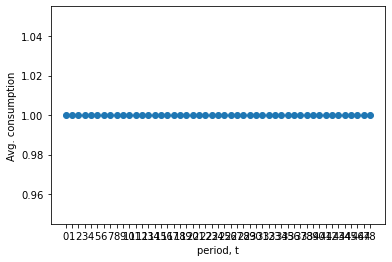

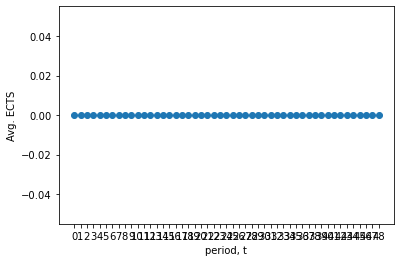

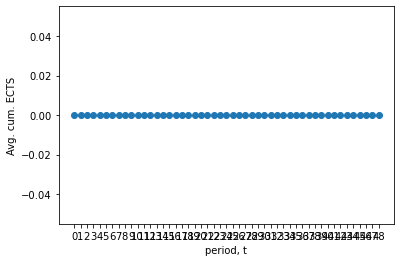

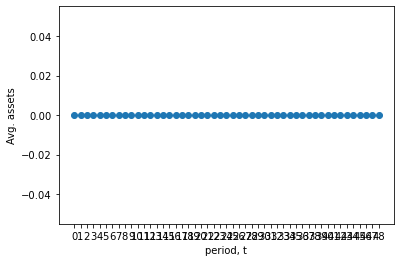

In [62]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.g,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.G,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(par.simT));

In [63]:
asset_sim = model_a.sim.a
asset_sim[1]

array([0.      , 0.000052, 0.000101, 0.000147, 0.000191, 0.000233,
       0.000272, 0.000309, 0.000344, 0.000377, 0.000408, 0.000437,
       0.000464, 0.000489, 0.000512, 0.000533, 0.000552, 0.00057 ,
       0.000585, 0.000599, 0.000611, 0.000621, 0.00063 , 0.000636,
       0.000641, 0.000643, 0.000644, 0.000643, 0.000639, 0.000633,
       0.000626, 0.000616, 0.000603, 0.000588, 0.000571, 0.00055 ,
       0.000527, 0.000535, 0.000536, 0.000529, 0.000515, 0.000493,
       0.000411, 0.000376, 0.000363, 0.000328, 0.000277, 0.000217,
       0.000171])

In [64]:
cons_sim = model_a.sim.c
cons_sim[1]

array([0.999949, 0.999953, 0.999956, 0.99996 , 0.999963, 0.999966,
       0.999969, 0.999972, 0.999974, 0.999977, 0.99998 , 0.999982,
       0.999985, 0.999987, 0.999989, 0.999991, 0.999994, 0.999996,
       0.999998, 1.      , 1.000002, 1.000004, 1.000006, 1.000008,
       1.00001 , 1.000012, 1.000014, 1.000016, 1.000018, 1.00002 ,
       1.000022, 1.000024, 1.000026, 1.000029, 1.000031, 1.000033,
       1.000003, 1.00001 , 1.000017, 1.000024, 1.000032, 1.00009 ,
       1.000043, 1.00002 , 1.000041, 1.000056, 1.000064, 1.000049,
       1.000181])

In [65]:
cc_sim = model_a.sim.G
cc_sim[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [66]:
credit_sim = model_a.sim.g
credit_sim[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

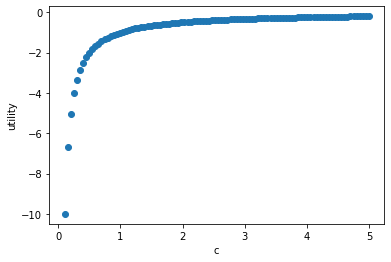

In [67]:
liste = []
liste_2 = []
g_list = []
c_list = []

for g in np.linspace(0,300,num=300):
    hm = model.util_s(1.0,g,0,29)
    liste.append(hm)
    g_list.append(g)

for c in np.linspace(0.1,5,num=100):
    hm = model.util_s(c, 0, 0, 29)
    liste_2.append(hm)
    c_list.append(c)

fig, ax = plt.subplots()
ax.scatter(c_list,liste_2)
ax.set(xlabel='c',ylabel='utility');

In [68]:
par.gamma_grid

array([0.018   , 0.017111, 0.016222, 0.015333, 0.014444, 0.013556,
       0.012667, 0.011778, 0.010889, 0.01    ])

In [69]:
par.m_grid

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
par.gamma_grid[9]

0.01